# **1.Implement Data similarity measures using Python**

# **a.Eulicidean Distance**

In [1]:
from math import*
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2)for a,b in zip(x,y)))
print(euclidean_distance([0,3,4,5],[7,6,3,-1]))

9.746794344808963


# **b.Manhattan distance**

In [2]:
from math import*
def manhattan_distance(x,y):
    return sum(abs(a-b)for a,b in zip(x,y))
print(manhattan_distance([10,20,10],[10,20,20]))

10


# **c.Minkowski distance**

In [3]:
from math import*
from decimal import Decimal
def nth_root(value,n_root):
  root_value=1/float(n_root)
  return round(Decimal(value)**Decimal(root_value),3)
def minkowski_distance(x,y,p_value):
  return nth_root(sum(pow(abs(a-b),p_value)for a,b in zip(x,y)),p_value)
print (minkowski_distance([0,3,4,5],[7,6,3,-1],3))

8.373


# **2.Implement Data similarity measures using Python**

# **a.Minkowski distance**

In [4]:
from math import*
from decimal import Decimal
def nth_root(value,n_root):
  root_value=1/float(n_root)
  return round(Decimal(value)**Decimal(root_value),3)
def minkowski_distance(x,y,p_value):
  return nth_root(sum(pow(abs(a-b),p_value)for a,b in zip(x,y)),p_value)
print (minkowski_distance([0,3,4,5],[7,6,3,-1],3))

8.373


# **b.Cosine Similarity**

In [6]:
from math import*
def square_rooted_value(x):
  return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
  numerator=sum(a*b for a,b in zip(x,y))
  denominator=square_rooted_value(x)*square_rooted_value(y)
  return round(numerator/float(denominator),3)
print(cosine_similarity([3, 45, 7, 2], [2, 54, 13, 15]))

0.972


# **c.Jaccard Similarity**

In [7]:
from math import*
def jaccard_similarity(x,y):
  intersection_cardinality=len(set.intersection(*[set(x),set(y)]))
  union_cardinality=len(set.union(*[set(x),set(y)]))
  return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


# **3.Implement dimension reduction techniques for recommender systems**

# **a.Missing Value Ratio**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use raw GitHub URL for direct CSV access
url = "https://raw.githubusercontent.com/hannarud/r-plotting/master/Train_UWu5bXk.csv"

# Load the dataset
train = pd.read_csv(url)

# Calculate percentage of missing values
a = train.isnull().sum() / len(train) * 100
print(a)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [14]:
variables = train.columns
selected_variables = []

for i in range(1, 12):  # columns 1 to 11 (0-based indexing)
    if a[i] <= 20:
        selected_variables.append(variables[i])

# Print results
print("All columns:", list(variables))
print("Columns with ≤ 20% missing values:", selected_variables)

All columns: ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
Columns with ≤ 20% missing values: ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


<ipython-input-14-47fc26f9d99f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if a[i] <= 20:


# **b.Low Variance Filter**

In [39]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
a=train.isnull().sum()/len(train)*100
print(a)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64


<ipython-input-39-c5e002a4f4fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
<ipython-input-39-c5e002a4f4fc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [16]:
numeric=train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
var=numeric.var()
print("Variance:\n",var)
numeric=numeric.columns
variable=[]
for i in range(len(var)):
  if var[i]>=10:
    variable.append(numeric[i])
print(numeric)
print(variable)

Variance:
 Item_Weight                    17.860122
Item_Visibility                 0.002662
Item_MRP                     3878.183909
Outlet_Establishment_Year      70.086372
dtype: float64
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')
['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']


<ipython-input-16-4dead1fe7343>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if var[i]>=10:


# **4.Implement dimension reduction techniques for recommender systems**

# **a.Random Forest**

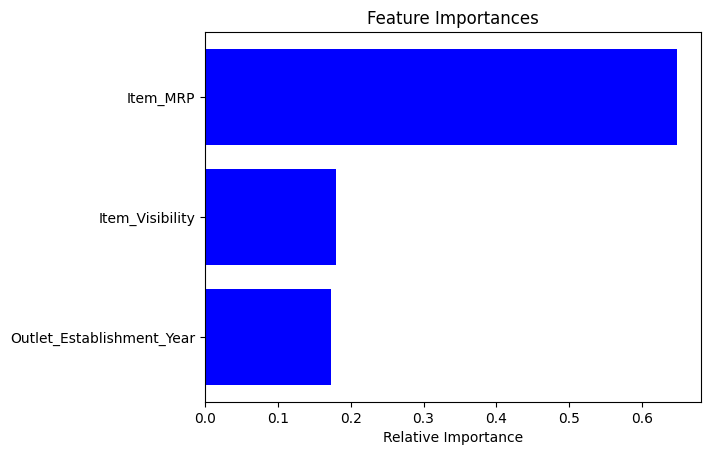

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use raw GitHub URL for direct CSV access
url = "https://raw.githubusercontent.com/hannarud/r-plotting/master/Train_UWu5bXk.csv"

# Load the dataset
train = pd.read_csv(url)
from sklearn.ensemble import RandomForestRegressor
df=train[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
df.corr()
model=RandomForestRegressor(random_state=1,max_depth=10)
model.fit(df,train.Item_Outlet_Sales)
features=df.columns
importances=model.feature_importances_
indices=np.argsort(importances)[-3:]
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **b.Factor Analysis**

In [22]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 55.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=a42e3df69ccf59777f57e85f24d30cc1a95f55fd78f254aa8fdadc6eb4921a6d
  Stored in directory: /root/.cache/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset


In [27]:
import pandas as pd
from pydataset import data
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import numpy as np
df = data('bioChemists')
df = df.iloc[0:15]
print(df)
X = df[['art', 'kid5', 'phd', 'ment']]
print(X)

    art    fem      mar  kid5    phd  ment
1     0    Men  Married     0  2.520     7
2     0  Women   Single     0  2.050     6
3     0  Women   Single     0  3.750     6
4     0    Men  Married     1  1.180     3
5     0  Women   Single     0  3.750    26
6     0  Women  Married     2  3.590     2
7     0  Women   Single     0  3.190     3
8     0    Men  Married     2  2.960     4
9     0    Men   Single     0  4.620     6
10    0  Women  Married     0  1.250     0
11    0    Men   Single     0  2.960    14
12    0  Women   Single     0  0.755    13
13    0  Women  Married     1  3.690     3
14    0  Women  Married     0  3.400     4
15    0  Women  Married     0  1.790     0
    art  kid5    phd  ment
1     0     0  2.520     7
2     0     0  2.050     6
3     0     0  3.750     6
4     0     1  1.180     3
5     0     0  3.750    26
6     0     2  3.590     2
7     0     0  3.190     3
8     0     2  2.960     4
9     0     0  4.620     6
10    0     0  1.250     0
11    0     0  

In [28]:
fact_2c = FactorAnalysis(n_components = 2)
X_factor = fact_2c.fit_transform(X)
thisdict = {"Single" : "0" , "Married" : "1"}
thisdict

z = np.array(df.mar.map(thisdict), dtype = int)
colors = np.array(["blue", "purple"])
print(z)

[1 0 0 1 0 1 0 1 0 1 0 0 1 1 1]


Text(0, 0.5, 'Factor 2')

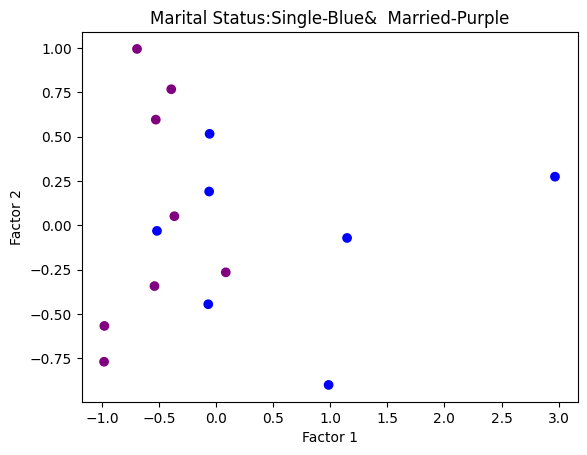

In [30]:
plt.title('Marital Status:Single-Blue&  Married-Purple')
plt.scatter(X_factor[:, 0], X_factor[:, 1], c = colors[z])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

# **5.Implement dimension reduction techniques for recommender systems with Principal Component Analysis (PCA)**

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df=load_wine(as_frame=True)
df=df.frame
df.drop('target',axis=1,inplace=True)
df.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [34]:
scaler=StandardScaler()
features=scaler.fit(df)
features=features.transform(df)
scaled_df=pd.DataFrame(features,columns=df.columns)
scaled_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


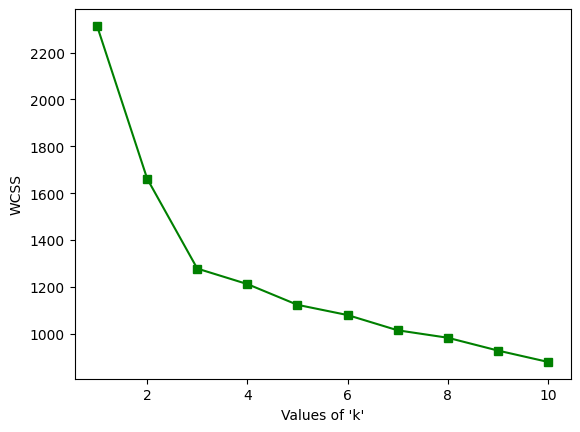

KMeans(n_clusters=3)

In [36]:
X=scaled_df.values
wcss={}
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss[i]=kmeans.inertia_
plt.plot(wcss.keys(),wcss.values(),'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel("WCSS")
plt.show()
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)


In [37]:
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head()

,PCA1,PCA2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


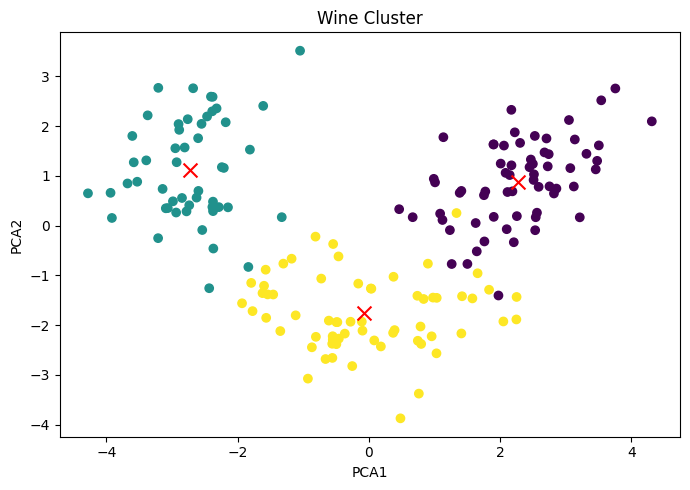

In [38]:
centers=pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()
plt.show()

# **9.Implement content-based recommendation systems with Rule Based Classifier**

For dataset:
Go to this link:https://www.geeksforgeeks.org/recommendation-system-in-python/
Under "Loading datasets": download 2 datasets(ratings.csv and movies.csv)

In [18]:
# Content-Based Recommendation System using Rule-Based Classifier
import pandas as pd
import numpy as np

# Load datasets
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

# Display first few rows
print("Ratings:")
print(ratings.head())
print("\nMovies:")
print(movies.head())

# Preprocess genres: One-hot encode genres
movies["genres"] = movies["genres"].str.split("|")
movies_exploded = movies.explode("genres")

# One-hot encode genres
genre_dummies = pd.get_dummies(movies_exploded["genres"])
movies_genres = pd.concat([movies_exploded[["movieId"]], genre_dummies], axis=1)

# Combine genre one-hots by movieId (to collapse duplicates)
movies_genres = movies_genres.groupby("movieId").max().reset_index()

# Merge ratings with genre features
merged = pd.merge(ratings, movies_genres, on="movieId")

# List of genre columns
genre_columns = genre_dummies.columns.tolist()

# Compute average rating per genre for each user
user_genre_ratings = merged.groupby("userId")[genre_columns].mean().reset_index()

# Rule-based classifier: Identify top preferred genres for each user
def get_top_genres(row, threshold=0.3):  # Proportion of times a user rated genre positively
    return [genre for genre in genre_columns if row[genre] >= threshold]

user_genre_ratings["preferred_genres"] = user_genre_ratings.apply(lambda row: get_top_genres(row), axis=1)

# Recommendation function using rule-based classifier
def recommend_movies(user_id, top_n=5):
    # Get the preferred genres of the user
    user_row = user_genre_ratings[user_genre_ratings.userId == user_id]
    if user_row.empty:
        return ["No data available for this user."]

    preferred = user_row["preferred_genres"].values[0]
    if not preferred:
        return ["No preferred genres found for this user."]

    # Get list of movies already rated by the user
    rated_movies = ratings[ratings.userId == user_id]["movieId"].tolist()

    # Filter movies in exploded DataFrame with preferred genres
    candidate_movies = movies_exploded[movies_exploded["genres"].isin(preferred)]

    # Remove already rated movies
    candidate_movies = candidate_movies[~candidate_movies["movieId"].isin(rated_movies)]

    # Drop duplicates and get the movie titles
    recommended = candidate_movies.drop_duplicates("movieId")[["movieId"]]
    recommended = recommended.merge(movies[["movieId", "title"]], on="movieId", how="left")

    return recommended["title"].dropna().drop_duplicates().head(top_n).tolist()

# Test with a sample user
user_id = 1
print(f"\nRecommended movies for User {user_id}:")
print(recommend_movies(user_id))

Ratings:
   userId  movieId  rating   timestamp
0     877     4155       5  1651201566
1     305     7661       2  1639553712
2     381     8423       2  1610704432
3     208     6433       1  1650223767
4      47     7752       4  1663998365

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Recommended movies for User 1:
['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Sabrin